In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
import pandas as pd
from PIL import Image 
from PIL.ImageDraw import Draw

In [2]:
width = 516
height = 300
num_classes = 3
classes = ["posev", "thumb", "metal"]

In [3]:
model = tf.keras.models.load_model('./Saved-Models/Locator')

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 300, 516, 3)]        0         []                            
                                                                                                  
 bl_1 (Rescaling)            (None, 300, 516, 3)          0         ['input_1[0][0]']             
                                                                                                  
 bl_2 (Conv2D)               (None, 300, 516, 4)          112       ['bl_1[0][0]']                
                                                                                                  
 bl_3 (MaxPooling2D)         (None, 150, 258, 4)          0         ['bl_2[0][0]']                
                                                                                              

1/1 [==============================] - 0s 219ms/step
[202.96926391124725, 66.00034385919571, 348.99364614486694, 162.12281584739685]
Predicted class: posev


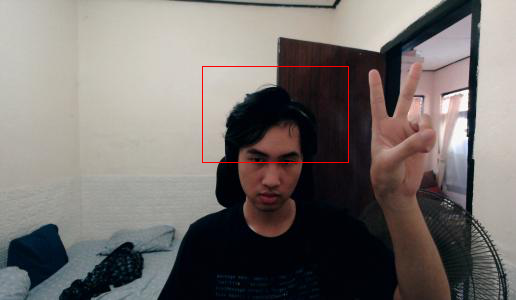

In [5]:
test_img = 'Images\Test\WIN_20240112_09_47_37_Pro_jpg.rf.97688d62f7955561b3ce5317b3286387.jpg'

img = keras.preprocessing.image.load_img(test_img, target_size=(height, width))

img = keras.preprocessing.image.img_to_array(img)
img = tf.expand_dims(img, 0)
predictions = model.predict(img)

bbox = predictions[1][0]
bbox = [bbox[0] * width, bbox[1] * height, bbox[2] * width, bbox[3] * height]
print(bbox)

class_prediction_value = predictions[0][0]
score = tf.nn.softmax(class_prediction_value)

#print(score)
score = tf.math.argmax(score)
print("Predicted class: {}".format(classes[score]))

testimg = keras.preprocessing.image.load_img(test_img, target_size=(height, width))
draw1 = Draw(testimg)
draw1.rectangle(bbox, outline='red')
testimg

1/1 [==============================] - 0s 36ms/step


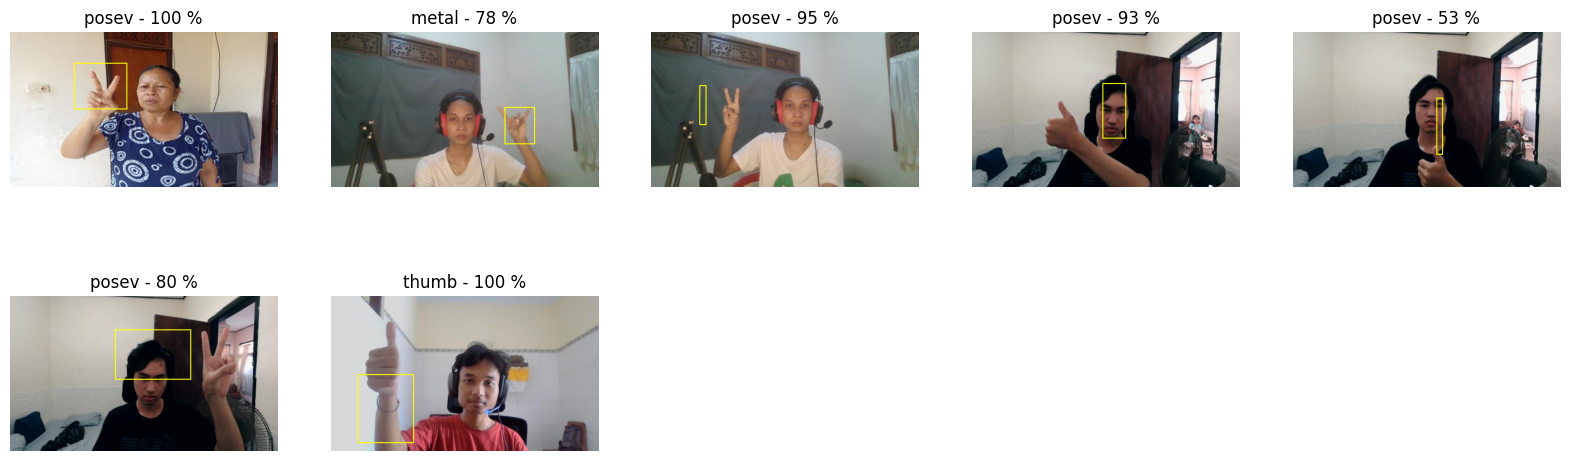

In [6]:
test_dir = pathlib.Path('Images/Test')
img_paths = list(test_dir.glob('*.jpg'))

plt.figure(figsize=(20, 20))
#print(len(img_paths))

for i, img_path in enumerate(img_paths):
    circle_img = keras.preprocessing.image.load_img(img_path, target_size=(height, width))
    img_arr = keras.preprocessing.image.img_to_array(circle_img)
    img_arr = tf.expand_dims(img_arr, 0)
    
    predictions = model.predict(img_arr)
    
    score = tf.nn.softmax(predictions[0][0])
    
    percent = int(round(100*np.max(score), 0))
    class_name = classes[np.argmax(score)]
    title = "{} - {} %".format(class_name, percent)
    #print(i)
    
    bbox = predictions[1][0]
    bbox = [bbox[0] * width, bbox[1] * height, bbox[2] * width, bbox[3] * height]
        
    draw1 = Draw(circle_img)
    draw1.rectangle(bbox, outline='yellow', width=2)
    #circle_img
    
    ax = plt.subplot(6, 5, i+1)
    plt.imshow(circle_img)
    plt.title(title)
    plt.axis("off")
    
plt.show()

In [7]:
model.save("model.h5")

C:\Users\WISNADI\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
